# apply the PCA ( prrinciple components analysis )
- reducing the dimentions of the data ( features )
- choose the eginvectors that has the heighest variance and make them as the dimentions 
- each egin vector is a vector of the main features

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df=pd.read_excel("D:/Programming/DATA - SCIENCE/oil_data/Chapter 3/Principal Component Analysis (PCA)/Chapter3_Completions_DataSet.xlsx")

In [3]:
df

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,173.4,45.5,1117.2,10.0
1,166.6,39.0,1117.2,10.0
2,159.8,41.6,1037.4,10.0
3,156.4,40.3,1197.0,10.0
4,170.0,46.8,1117.2,10.0
...,...,...,...,...
139,234.6,40.3,4309.2,105.0
140,227.8,40.3,4468.8,120.0
141,234.6,40.3,4069.8,115.0
142,197.2,35.1,4069.8,95.0


# first standarizinf the data

In [4]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df_standard=s.fit_transform(df)
df_standard=pd.DataFrame(df_standard,columns=df.columns)
df_standard


,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,-0.865617,1.018309,-1.299677,-1.280053
1,-1.105788,-0.125501,-1.299677,-1.280053
2,-1.345959,0.332023,-1.356287,-1.280053
3,-1.466045,0.103261,-1.243066,-1.280053
4,-0.985703,1.247071,-1.299677,-1.280053
...,...,...,...,...
139,1.295924,0.103261,0.964733,1.254119
140,1.055752,0.103261,1.077953,1.654251
141,1.295924,0.103261,0.794902,1.520874
142,-0.025018,-0.811787,0.794902,0.987364


# apply the PCA

In [13]:
from sklearn.decomposition import PCA
p=PCA()
df_transformed=p.fit_transform(df_standard)
df_transformed= pd.DataFrame(df_transformed,columns=df.columns)

<Figure size 720x576 with 0 Axes>

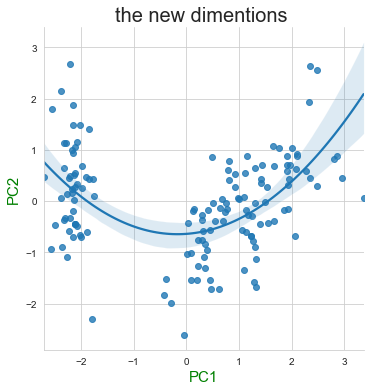

In [40]:
plt.figure(figsize=(10,8))
sns.lmplot(data=df_transformed,x="Stage Spacing",y="Cluster Spacing",palette="redgreen",fit_reg=True,order=2)
plt.xlabel("PC1",fontsize=15,color="green")
plt.title("the new dimentions ",fontsize=20)
plt.ylabel("PC2",fontsize=15,color="green")
plt.show()

### the vectors coefficients are

In [17]:
components= pd.DataFrame(p.components_,columns=df.columns)
components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.519427,-0.271276,0.580313,0.565545
1,0.387659,0.919532,0.024583,0.059802
2,-0.715775,0.256731,0.143414,0.633394
3,0.259966,-0.122305,-0.801289,0.524781


In [24]:
p.explained_variance_

array([2.9426187 , 0.92339068, 0.14243408, 0.01952857])

### as we see in the second vector , the most effective feature is the ( cluster spacing )

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2'), Text(0, 3.5, '3')])

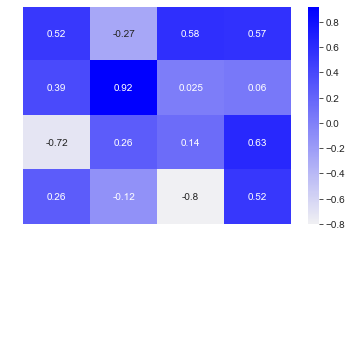

In [38]:
plt.figure()
palette=sns.light_palette(color="blue",as_cmap=True)
sns.heatmap(components,cmap=palette,annot=True)
plt.xticks(color="#fff")
plt.yticks(color="#fff")